In [117]:
%matplotlib inline
import pandas as pd
import pickle

## Load results

In [118]:
with open('data/benchmark_fixed_metadata1.pkl', 'rb') as f:
    cols_full, cols_short, series = pickle.load(f)

In [119]:
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/benchmark_fixed_{s}1.csv')
   for s in series 
}

In [120]:
total_timess = {
   s: d #[5:-5]
   for s,d in total_timess.items()
}

## Raw results

In [121]:
from ipywidgets import interact

In [122]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('upfront_symbolic_masked', 'symbolic_masked', 'u…

## Comparison

In [123]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,upfront_symbolic_masked,symbolic_masked,upfront_masked,masked,upfront_symbolic_unmasked,symbolic_unmasked,upfront_unmasked,unmasked
Flow*,81.187494,80.489716,80.441029,81.401300,82.825334,83.012579,83.161750,83.429202
unpreconditioning,86.295687,0.000000,84.766920,0.000000,89.209895,0.000000,88.885618,0.000000
P,1.420911,11.897921,1.364311,13.283160,3.446221,13.596719,3.299969,14.740137
Q,32.897718,52.568261,1.759220,22.837894,123.921391,207.834582,8.457561,83.852503
G(P | G(Q)),34.693077,64.558119,3.220164,36.213173,127.463483,221.522790,11.857280,98.683027
tentative eval,0.000000,0.938931,0.000000,0.812681,0.000000,3.316007,0.000000,3.271274
eval,1.511095,0.879330,1.400281,0.931477,5.788979,2.691230,5.535693,2.809607
root detection,0.006042,0.011179,1.613351,1.831949,0.016764,0.022358,6.003341,6.559224
composing flowpipe,86.237632,30.538983,84.702059,32.407094,89.144196,83.827573,88.823893,85.677384
composing atomic,32.601292,31.866298,0.009045,0.013109,120.988771,130.185339,0.024263,0.033781


In [124]:
comparison.to_csv("data/comparison.csv")

In [125]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,upfront_symbolic_masked,symbolic_masked,upfront_masked,masked,upfront_symbolic_unmasked,symbolic_unmasked,upfront_unmasked,unmasked
Flow*,3.970154,0.770320,0.482998,0.699710,2.658992,1.654890,2.245100,2.654141
unpreconditioning,4.944137,0.000000,0.730628,0.000000,6.618034,0.000000,6.735343,0.000000
P,0.124445,0.368415,0.020082,2.293946,0.320111,0.751568,0.275213,1.929571
Q,2.363669,0.303355,0.027900,0.145597,7.987999,11.349186,0.750038,8.765052
G(P | G(Q)),2.518417,0.439257,0.044412,2.307301,8.059726,11.656156,0.926555,10.196482
tentative eval,0.000000,0.064901,0.000000,0.009946,0.000000,0.209603,0.000000,0.290368
eval,0.097560,0.011220,0.013398,0.041050,0.358896,0.161220,0.414430,0.284065
root detection,0.000337,0.003693,0.019308,0.053672,0.000665,0.003223,0.522833,0.672969
composing flowpipe,4.942961,0.355362,0.730252,2.212018,6.616088,4.478834,6.733819,8.986378
composing atomic,2.325455,0.222210,0.000725,0.000497,7.831675,6.490779,0.002409,0.002631


In [126]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose(copy=True)
comparison2

,P,Q
upfront_symbolic_masked,1.420911,32.897718
symbolic_masked,11.897921,52.568261
upfront_masked,1.364311,1.759220
masked,13.283160,22.837894
upfront_symbolic_unmasked,3.446221,123.921391
symbolic_unmasked,13.596719,207.834582
upfront_unmasked,3.299969,8.457561
unmasked,14.740137,83.852503


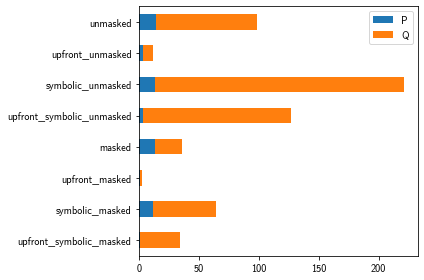

In [127]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [128]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [129]:
p.get_figure().savefig('images/comparison-analysis-bar-chart-1.pdf')

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


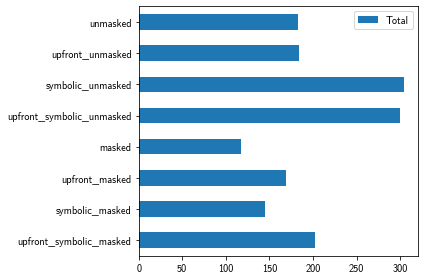

In [130]:
comparison3 = comparison.loc[['Total'],:].transpose(copy=True)
comparison3.plot(kind='barh')

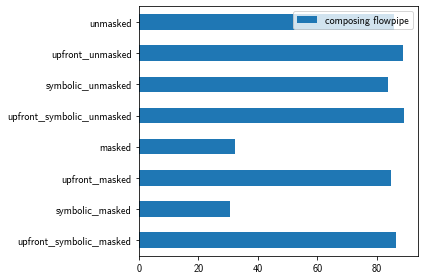

In [131]:
comparison_compo = comparison.loc[['composing flowpipe'],:].transpose(copy=True)
comparison_compo.plot(kind='barh')

In [132]:
_.get_figure().savefig('images/unpreconditioning_comparison.pdf')

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


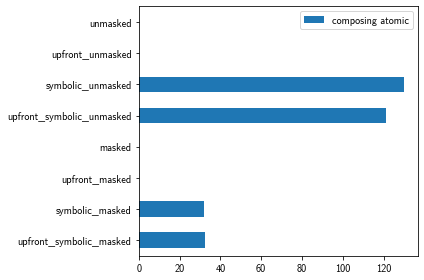

In [133]:
comparison_compo_atomic = comparison.loc[['composing atomic'],:].transpose(copy=True)
comparison_compo_atomic.plot(kind='barh')

In [134]:
_.get_figure().savefig('images/composing_atomic_comparison.pdf')

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [135]:
comparison5 = comparison.loc[['composing flowpipe'],:].transpose(copy=True)
comparison5

,composing flowpipe
upfront_symbolic_masked,86.237632
symbolic_masked,30.538983
upfront_masked,84.702059
masked,32.407094
upfront_symbolic_unmasked,89.144196
symbolic_unmasked,83.827573
upfront_unmasked,88.823893
unmasked,85.677384


In [136]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q', 'Total'],:].transpose(copy=True)
comparison4

,Flow*,P,Q,Total
upfront_symbolic_masked,81.187494,1.420911,32.897718,202.301421
symbolic_masked,80.489716,11.897921,52.568261,145.183930
upfront_masked,80.441029,1.364311,1.759220,168.555167
masked,81.401300,13.283160,22.837894,117.749694
upfront_symbolic_unmasked,82.825334,3.446221,123.921391,299.626281
symbolic_unmasked,83.012579,13.596719,207.834582,304.670659
upfront_unmasked,83.161750,3.299969,8.457561,184.032715
unmasked,83.429202,14.740137,83.852503,182.249256


In [137]:
upfront_cols = [s for s in series if 'upfront' in s]
upfront_cols

['upfront_symbolic_masked',
 'upfront_masked',
 'upfront_symbolic_unmasked',
 'upfront_unmasked']

In [138]:
comparison.loc[['unpreconditioning'], upfront_cols].transpose()

,unpreconditioning
upfront_symbolic_masked,86.295687
upfront_masked,84.766920
upfront_symbolic_unmasked,89.209895
upfront_unmasked,88.885618


In [139]:
comparison6 = comparison4.join(comparison.loc[['unpreconditioning'], upfront_cols].transpose(copy=True),
                               how='outer')
comparison6['unpreconditioning'].fillna(0, inplace=True)
cols = comparison6.columns.tolist()
print(cols)
cols = cols[:1] + cols[-1:] + cols[1:-1]
print(cols)
comparison6 = comparison6[cols]
comparison6

['Flow*', 'P', 'Q', 'Total', 'unpreconditioning']
['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']


,Flow*,unpreconditioning,P,Q,Total
masked,81.401300,0.000000,13.283160,22.837894,117.749694
symbolic_masked,80.489716,0.000000,11.897921,52.568261,145.183930
symbolic_unmasked,83.012579,0.000000,13.596719,207.834582,304.670659
unmasked,83.429202,0.000000,14.740137,83.852503,182.249256
upfront_masked,80.441029,84.766920,1.364311,1.759220,168.555167
upfront_symbolic_masked,81.187494,86.295687,1.420911,32.897718,202.301421
upfront_symbolic_unmasked,82.825334,89.209895,3.446221,123.921391,299.626281
upfront_unmasked,83.161750,88.885618,3.299969,8.457561,184.032715


In [140]:
rearranged_colors = ('#0A5C9F', 'tab:blue', 'tab:orange', 'tab:green')

In [141]:
p.get_figure().savefig('images/full-upfront-comparison.pdf')

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [142]:
chosen_rows, chosen_names = zip(*[
#    'upfront_unmasked',
     ('upfront_unmasked', 'Closed-box\n monitoring'),
#    ('upfront_symbolic_unmasked', 'Unpreconditioning upfront symb'),
#    'upfront_symbolic_unmasked',
    ('unmasked', 'Functional\n composition'),
#    'symbolic_unmasked',
    ('symbolic_unmasked', 'Full\n monitoring'),
    ('symbolic_masked', 'Masked\n monitoring'),
#    'symbolic_masked_reversed',
#    'symbolic_masked_reversed',
])

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)  

In [144]:
comparison6[['Total']].sum(axis=1) 

masked                       117.749694
symbolic_masked              145.183930
symbolic_unmasked            304.670659
unmasked                     182.249256
upfront_masked               168.555167
upfront_symbolic_masked      202.301421
upfront_symbolic_unmasked    299.626281
upfront_unmasked             184.032715
dtype: float64

In [145]:
comparison6[cols[:-1]].sum(axis=1)

masked                       117.522354
symbolic_masked              144.955898
symbolic_unmasked            304.443880
unmasked                     182.021842
upfront_masked               168.331480
upfront_symbolic_masked      201.801810
upfront_symbolic_unmasked    299.402841
upfront_unmasked             183.804898
dtype: float64

In [146]:
comparison6.sum(axis=1)

masked                       235.272048
symbolic_masked              290.139828
symbolic_unmasked            609.114539
unmasked                     364.271098
upfront_masked               336.886647
upfront_symbolic_masked      404.103231
upfront_symbolic_unmasked    599.029121
upfront_unmasked             367.837613
dtype: float64

In [147]:
rem = comparison6[['Total']].sum(axis=1) - comparison6[cols[:-1]].sum(axis=1)
rem

masked                       0.227341
symbolic_masked              0.228032
symbolic_unmasked            0.226779
unmasked                     0.227414
upfront_masked               0.223687
upfront_symbolic_masked      0.499612
upfront_symbolic_unmasked    0.223440
upfront_unmasked             0.227818
dtype: float64

In [148]:
comparison7 = comparison6.copy()
comparison7.loc[:,'Remainder'] = rem
cols7 = comparison6.columns.tolist()
print(cols)
cols7 = cols7[:-2] + [cols7[-1], cols7[-2]]
print(cols)
comparison7 = comparison7[cols7]
comparison7

['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']
['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']


,Flow*,unpreconditioning,P,Total,Q
masked,81.401300,0.000000,13.283160,117.749694,22.837894
symbolic_masked,80.489716,0.000000,11.897921,145.183930,52.568261
symbolic_unmasked,83.012579,0.000000,13.596719,304.670659,207.834582
unmasked,83.429202,0.000000,14.740137,182.249256,83.852503
upfront_masked,80.441029,84.766920,1.364311,168.555167,1.759220
upfront_symbolic_masked,81.187494,86.295687,1.420911,202.301421,32.897718
upfront_symbolic_unmasked,82.825334,89.209895,3.446221,299.626281,123.921391
upfront_unmasked,83.161750,88.885618,3.299969,184.032715,8.457561


In [149]:
comparison6['Total']['masked']

117.74969449465425

In [150]:
list(comparison6['Total'][reversed(chosen_rows)].items())

[('symbolic_masked', 145.18392963059887),
 ('symbolic_unmasked', 304.67065868270146),
 ('unmasked', 182.24925616350373),
 ('upfront_unmasked', 184.0327153275968)]

In [151]:
comp6_plot_data = comparison6.loc[reversed(chosen_rows),:][cols[:-1]].copy()
comp6_plot_data = comp6_plot_data.transpose()
comp6_plot_data.columns = reversed(chosen_names)
comp6_plot_data = comp6_plot_data.transpose()
comp6_plot_data.columns = [
    'Verified integration',
    'Flowpipe composition',
    'Monitoring P',
    'Monitoring Q',
]
comp6_plot_data

,Verified integration,Flowpipe composition,Monitoring P,Monitoring Q
Masked\n monitoring,80.489716,0.000000,11.897921,52.568261
Full\n monitoring,83.012579,0.000000,13.596719,207.834582
Functional\n composition,83.429202,0.000000,14.740137,83.852503
Closed-box\n monitoring,83.161750,88.885618,3.299969,8.457561


In [152]:
comp6_plot_data[1:]

,Verified integration,Flowpipe composition,Monitoring P,Monitoring Q
Full\n monitoring,83.012579,0.000000,13.596719,207.834582
Functional\n composition,83.429202,0.000000,14.740137,83.852503
Closed-box\n monitoring,83.161750,88.885618,3.299969,8.457561


In [153]:
rcParams['font.family'] = 'Latin Modern Sans'
rcParams['font.size'] = 13.5
rcParams['text.usetex'] = False

In [154]:
chosen_rows

('upfront_unmasked', 'unmasked', 'symbolic_unmasked', 'symbolic_masked')

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


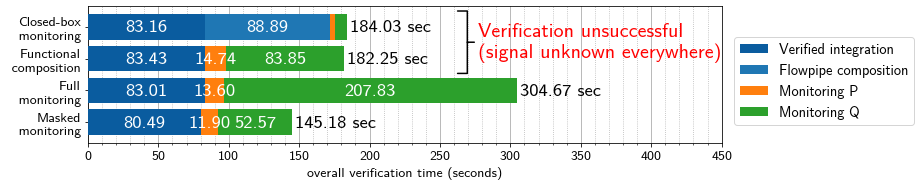

In [155]:
p = comp6_plot_data\
    .plot(kind='barh', stacked=True, grid=False,color=rearranged_colors, figsize=(13,2.8),
          zorder=3, width=0.8)
#plt.legend(loc=(1.05, 0.105))
plt.legend(fontsize=14, loc=(1.02, 0.13))
plt.xlabel('overall verification time (seconds)')
ax = plt.gca()
ax.set_xticks(np.arange(0, 451, 50))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.grid(True, zorder=0, linestyle='-', color='darkgrey', which='major')
ax.xaxis.grid(True, zorder=0, linestyle='dotted', which='minor')

labels = [
    f"{t:.2f} sec"
#     + ('' if 'symbolic' in row
#           else "\n (returned unknown)")
    for row, t in comparison6['Total'][reversed(chosen_rows)].items()
]

def anno_inner(p, label, color='black'):
    ax.annotate(
        label,
        xy=(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height()/2),
        xytext=(0, 0),
        size=18,
        textcoords="offset points",
        va='center', ha='center',
        color=color
    )

for i, p in enumerate(ax.patches):
    if p.get_width() > 10:
        col = ['Flow*', 'unpreconditioning', 'P', 'Q'][i // 4]
        anno_inner(p, f"{comparison6[col][chosen_rows[3-(i % 4)]]:.2f}", 'white')
        
for i, label in zip(ax.patches[-4:], labels):
    ax.annotate(
        label,
        xy=(i.get_x() + i.get_width(),
            i.get_y() + i.get_height()/2),
        xytext=(3, 0),
        textcoords="offset points",
        va='center', ha='left',
        size='18'
    )
    
plt.annotate(
    'Verification unsuccessful\n(signal unknown everywhere)',
    xy=(268, 2.52),
    va='center', ha='left',
    xytext=(13,0),
#    weight='bold',
    textcoords="offset points",
    color='red',
    size=19.5,
    arrowprops=dict(arrowstyle='-[, widthB=1.6, lengthB=0.5, angleB=60', lw=1.5),
)

plt.tight_layout()
plt.savefig('images/benchmark-bar-chart.pdf')
plt.show()

In [156]:
chosen_rows1 = chosen_rows[:3]; chosen_rows1

('upfront_unmasked', 'unmasked', 'symbolic_unmasked')

In [157]:
labels

['145.18 sec', '304.67 sec', '182.25 sec', '184.03 sec']

In [158]:
for i, p in enumerate(ax.patches):
    if True: #p.get_width() > 20:
        col = ['Flow*', 'unpreconditioning', 'P', 'Q'][i // 3]
        print(i // 2, 1 - (i % 2), col, chosen_rows2[2 - (i % 3)], f"{comparison6[col][chosen_rows2[1-(i % 2)]]:.2f}")

IndexError: tuple index out of range

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


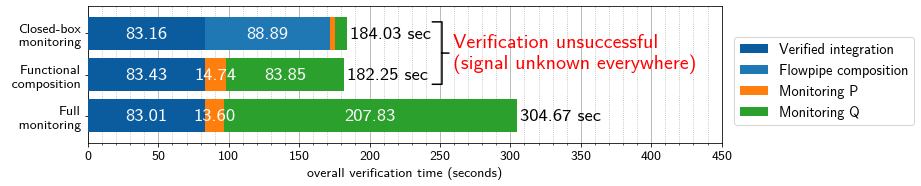

In [171]:
p = comp6_plot_data[1:]\
    .plot(kind='barh', stacked=True, grid=False,color=rearranged_colors, figsize=(13,2.8),
          zorder=3, width=0.8)
#plt.legend(loc=(1.05, 0.105))
plt.legend(fontsize=14, loc=(1.02, 0.13))
plt.xlabel('overall verification time (seconds)')
ax = plt.gca()
ax.set_xticks(np.arange(0, 451, 50))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.grid(True, zorder=0, linestyle='-', color='darkgrey', which='major')
ax.xaxis.grid(True, zorder=0, linestyle='dotted', which='minor')

labels = [
    f"{t:.2f} sec"
#     + ('' if 'symbolic' in row
#           else "\n (returned unknown)")
    for row, t in comparison6['Total'][reversed(chosen_rows1)].items()
]

def anno_inner(p, label, color='black'):
    ax.annotate(
        label,
        xy=(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height()/2),
        xytext=(0, 0),
        size=18,
        textcoords="offset points",
        va='center', ha='center',
        color=color
    )

for i, p in enumerate(ax.patches):
    if p.get_width() > 10:
        col = ['Flow*', 'unpreconditioning', 'P', 'Q'][i // 3]
        anno_inner(p, f"{comparison6[col][chosen_rows1[2-(i % 3)]]:.2f}", 'white')
        
for i, label in zip(ax.patches[-3:], labels[:]):
    ax.annotate(
        label,
        xy=(i.get_x() + i.get_width(),
            i.get_y() + i.get_height()/2),
        xytext=(3, 0),
        textcoords="offset points",
        va='center', ha='left',
        size='18'
    )
    
plt.annotate(
    'Verification unsuccessful\n(signal unknown everywhere)',
    xy=(250, 1.52),
    va='center', ha='left',
    xytext=(13,0),
#    weight='bold',
    textcoords="offset points",
    color='red',
    size=19.5,
    arrowprops=dict(arrowstyle='-[, widthB=1.6, lengthB=0.5, angleB=60', lw=1.5),
)

plt.tight_layout()
plt.savefig('images/benchmark-bar-chart-1.pdf')
plt.show()

In [160]:
chosen_rows2 = chosen_rows[2:]; chosen_rows2

('symbolic_unmasked', 'symbolic_masked')

In [161]:
comp6_plot_data

,Verified integration,Flowpipe composition,Monitoring P,Monitoring Q
Masked\n monitoring,80.489716,0.000000,11.897921,52.568261
Full\n monitoring,83.012579,0.000000,13.596719,207.834582
Functional\n composition,83.429202,0.000000,14.740137,83.852503
Closed-box\n monitoring,83.161750,88.885618,3.299969,8.457561


'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


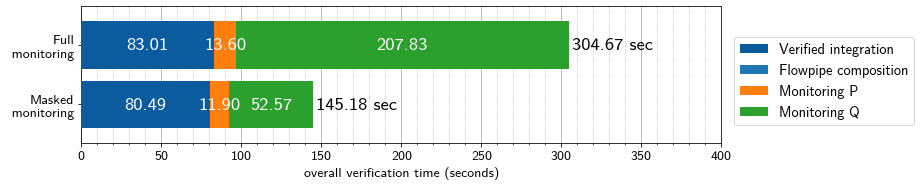

In [170]:
p = comp6_plot_data[:2]\
    .plot(kind='barh', stacked=True, grid=False,color=rearranged_colors, figsize=(13,2.8),
          zorder=3, width=0.8)
#plt.legend(loc=(1.05, 0.105))
plt.legend(fontsize=14, loc=(1.02, 0.13))
plt.xlabel('overall verification time (seconds)')
ax = plt.gca()
ax.set_xticks(np.arange(0, 401, 50))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.grid(True, zorder=0, linestyle='-', color='darkgrey', which='major')
ax.xaxis.grid(True, zorder=0, linestyle='dotted', which='minor')

labels = [
    f"{t:.2f} sec"
#     + ('' if 'symbolic' in row
#           else "\n (returned unknown)")
    for row, t in comparison6['Total'][reversed(chosen_rows2)].items()
]

def anno_inner(p, label, color='black'):
    ax.annotate(
        label,
        xy=(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height()/2),
        xytext=(0, 0),
        size=18,
        textcoords="offset points",
        va='center', ha='center',
        color=color
    )

for i, p in enumerate(ax.patches):
    if p.get_width() > 10:
        col = ['Flow*', 'unpreconditioning', 'P', 'Q'][i // 2]
        anno_inner(p, f"{comparison6[col][chosen_rows2[1-(i % 2)]]:.2f}", 'white')
        
for i, label in zip(ax.patches[-2:], labels[:]):
    ax.annotate(
        label,
        xy=(i.get_x() + i.get_width(),
            i.get_y() + i.get_height()/2),
        xytext=(3, 0),
        textcoords="offset points",
        va='center', ha='left',
        size='18'
    )

plt.tight_layout()
plt.savefig('images/benchmark-bar-chart-2.pdf')
plt.show()

In [164]:
comparison7['Q']['symbolic_unmasked']

207.8345819592476

In [165]:
Qs = comparison7['Q']; Qs

masked                        22.837894
symbolic_masked               52.568261
symbolic_unmasked            207.834582
unmasked                      83.852503
upfront_masked                 1.759220
upfront_symbolic_masked       32.897718
upfront_symbolic_unmasked    123.921391
upfront_unmasked               8.457561
Name: Q, dtype: float64

In [166]:
(Qs['symbolic_unmasked'] - Qs['symbolic_masked'])/Qs['symbolic_unmasked']

0.7470668256126523

In [167]:
comparison7['unmasked_symbolic']['Q']

KeyError: 'unmasked_symbolic'

In [168]:
(comparison7['unmasked_symbolic']['Q'] - comparison7['masked_symbolic']['Q']) / comparison7['unmasked_symbolic']['Q']

KeyError: 'unmasked_symbolic'

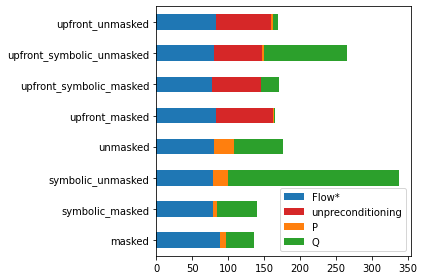

In [58]:
p = comparison6[cols[:-1]].plot(
                    kind='barh', stacked=True, grid=False,
                     color=rearranged_colors)
p

In [28]:
comparison.loc[:,chosen_columns]

,upfront_unmasked,unmasked,symbolic_unmasked,symbolic_masked
Flow*,82.258631,79.551850,78.870518,78.083259
unpreconditioning,77.629671,0.000000,0.000000,0.000000
P,2.871566,28.578011,21.243604,6.771044
Q,6.497924,67.533209,237.785437,54.428931
G(P | G(Q)),9.463389,96.202800,259.128790,61.303555
tentative eval,0.000000,3.073284,3.592893,0.646078
eval,4.841570,3.833150,2.413262,0.617105
root detection,4.310877,5.651744,0.037560,0.013074
composing flowpipe,77.574421,83.307537,58.222266,13.728399
composing atomic,0.021429,0.028341,193.635825,45.798945


In [29]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-2.pdf')

In [30]:
comparison5 = comparison6.copy()

In [31]:
comparison.loc[['Flow*', 'G(P | G(Q))'], :].transpose()

,Flow*,G(P | G(Q))
upfront_symbolic_masked,77.704968,25.222963
symbolic_masked,78.083259,61.303555
upfront_masked,82.934898,1.853803
masked,87.898530,48.431379
upfront_symbolic_unmasked,80.336791,117.882873
symbolic_unmasked,78.870518,259.128790
upfront_unmasked,82.258631,9.463389
unmasked,79.551850,96.202800


In [32]:
rem = comparison.loc[['Total'], :].transpose().sum(axis=1) - comparison6.sum(axis=1)
rem

masked                       0.245319
symbolic_masked              0.223994
symbolic_unmasked            0.223973
unmasked                     0.231742
upfront_masked               0.238025
upfront_symbolic_masked      0.228357
upfront_symbolic_unmasked    0.217138
upfront_unmasked             0.233503
dtype: float64

In [33]:
comparison6.loc[:,'Remainder'] = rem

In [34]:
comparison6

,Flow*,unpreconditioning,P,Q,Remainder
masked,87.898530,0.000000,9.285413,39.050409,0.245319
symbolic_masked,78.083259,0.000000,6.771044,54.428931,0.223994
symbolic_unmasked,78.870518,0.000000,21.243604,237.785437,0.223973
unmasked,79.551850,0.000000,28.578011,67.533209,0.231742
upfront_masked,82.934898,79.827351,0.733038,1.026020,0.238025
upfront_symbolic_masked,77.704968,67.341991,0.429924,24.689693,0.228357
upfront_symbolic_unmasked,80.336791,66.905820,1.816989,115.969380,0.217138
upfront_unmasked,82.258631,77.629671,2.871566,6.497924,0.233503


In [35]:
comparison5.to_csv("data/comparison-remainder-analysis.csv")

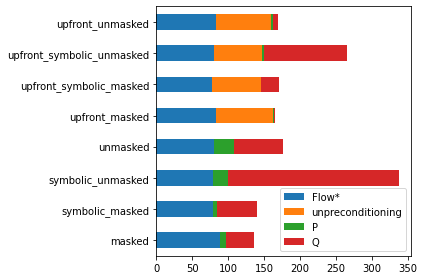

In [36]:
p = comparison5.plot(kind='barh', stacked=True, grid=False); p

In [37]:
p.get_figure().savefig(
    'images/key-comparison-analysis-bar-chart.pdf')

In [38]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [39]:
comparison6

,Flow*,P,Q,Total
upfront_symbolic_masked,77.704968,0.429924,24.689693,170.394933
symbolic_masked,78.083259,6.771044,54.428931,139.507228
upfront_masked,82.934898,0.733038,1.026020,164.759333
masked,87.898530,9.285413,39.050409,136.479671
upfront_symbolic_unmasked,80.336791,1.816989,115.969380,265.246118
symbolic_unmasked,78.870518,21.243604,237.785437,338.123532
upfront_unmasked,82.258631,2.871566,6.497924,169.491295
unmasked,79.551850,28.578011,67.533209,175.894812


In [40]:
comparison6.to_csv('data/key-comparison-analysis.csv')

In [41]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

Total    1.288799
dtype: float64

In [42]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

KeyError: 'unmasked_no_symbolic'

In [ ]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

In [ ]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

In [ ]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]